In [1]:
!pip install -q transformers


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

c:\Users\rishi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rishi\.cache\huggingface\hub\models--CIDAS--clipseg-rd64-refined. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/603M [00:00<?, ?B/s]

c:\Users\rishi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
import cv2
image=cv2.imread("C:\\Users\\rishi\\OneDrive\\Desktop\\Zero-Shot\\res\\test.png")

In [16]:
prompts = ["products in small shelves"]
import torch

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
# predict
with torch.no_grad():
  outputs = model(**inputs)
preds = outputs.logits.unsqueeze(1)


Unused or unrecognized kwargs: padding.


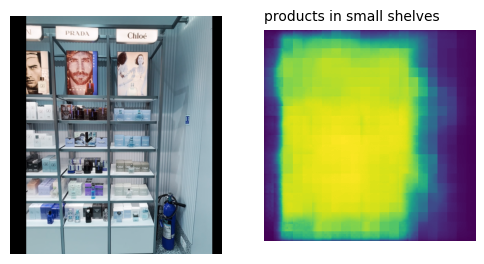

In [17]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];


In [18]:
from transformers import pipeline

checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

c:\Users\rishi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rishi\.cache\huggingface\hub\models--google--owlv2-base-patch16-ensemble. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

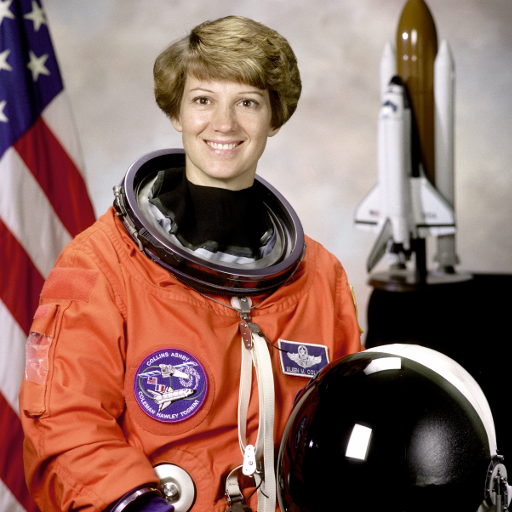

In [19]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

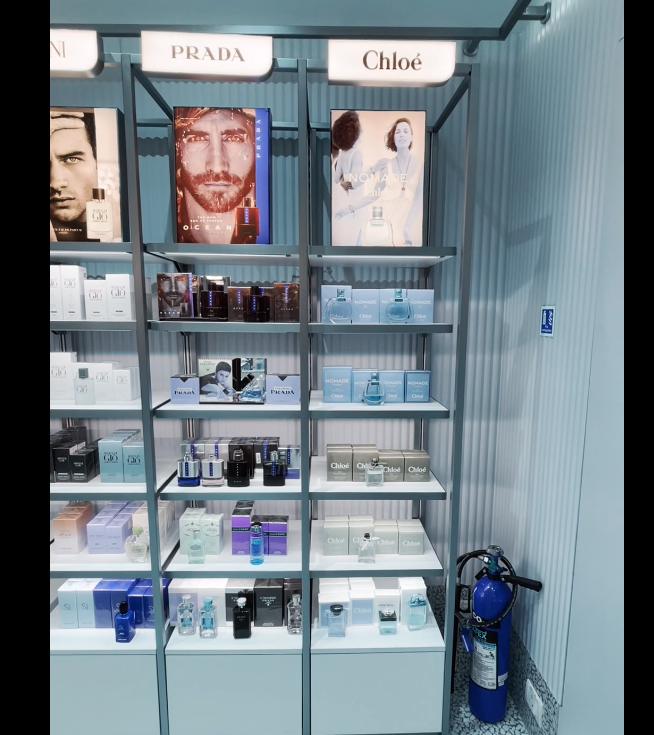

In [24]:
image2=cv2.imread("C:\\Users\\rishi\\OneDrive\\Desktop\\Zero-Shot\\res\\test.png")
image2 = Image.fromarray(np.uint8(image2)).convert("RGB")
image2

In [25]:
predictions = detector(
    image,
    candidate_labels=["human face", "rocket", "nasa badge", "star-spangled banner"],
)
predictions

[{'score': 0.6007455587387085,
  'label': 'nasa badge',
  'box': {'xmin': 132, 'ymin': 348, 'xmax': 208, 'ymax': 423}},
 {'score': 0.5126065611839294,
  'label': 'nasa badge',
  'box': {'xmin': 278, 'ymin': 339, 'xmax': 329, 'ymax': 378}},
 {'score': 0.45199570059776306,
  'label': 'star-spangled banner',
  'box': {'xmin': 1, 'ymin': -1, 'xmax': 99, 'ymax': 505}},
 {'score': 0.29185566306114197,
  'label': 'rocket',
  'box': {'xmin': 352, 'ymin': 26, 'xmax': 465, 'ymax': 288}},
 {'score': 0.2252567857503891,
  'label': 'rocket',
  'box': {'xmin': 429, 'ymin': 40, 'xmax': 458, 'ymax': 260}},
 {'score': 0.20959727466106415,
  'label': 'star-spangled banner',
  'box': {'xmin': 7, 'ymin': 0, 'xmax': 512, 'ymax': 506}},
 {'score': 0.2048656940460205,
  'label': 'nasa badge',
  'box': {'xmin': 23, 'ymin': 330, 'xmax': 52, 'ymax': 384}},
 {'score': 0.19575214385986328,
  'label': 'rocket',
  'box': {'xmin': 395, 'ymin': -1, 'xmax': 438, 'ymax': 184}},
 {'score': 0.1818598210811615,
  'label':

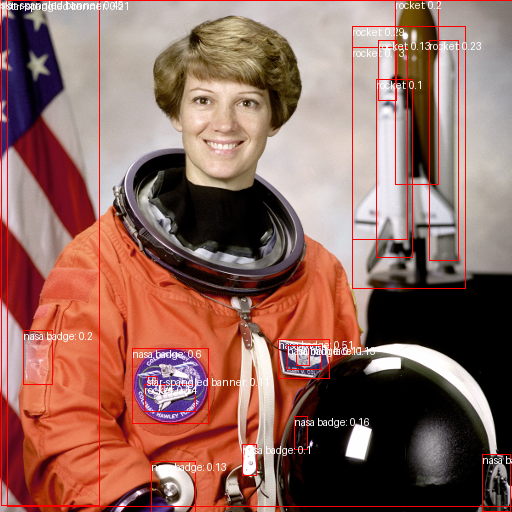

In [26]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

In [41]:
predictions = detector(
    image2,
    candidate_labels=["chloe"],
)
predictions

[{'score': 0.15919238328933716,
  'label': 'chloe',
  'box': {'xmin': 321, 'ymin': 373, 'xmax': 342, 'ymax': 405}},
 {'score': 0.14006654918193817,
  'label': 'chloe',
  'box': {'xmin': 327, 'ymin': 148, 'xmax': 375, 'ymax': 246}},
 {'score': 0.11467981338500977,
  'label': 'chloe',
  'box': {'xmin': 333, 'ymin': 204, 'xmax': 351, 'ymax': 247}},
 {'score': 0.11424539238214493,
  'label': 'chloe',
  'box': {'xmin': 316, 'ymin': 115, 'xmax': 376, 'ymax': 248}},
 {'score': 0.11124813556671143,
  'label': 'chloe',
  'box': {'xmin': 342, 'ymin': 289, 'xmax': 366, 'ymax': 324}}]

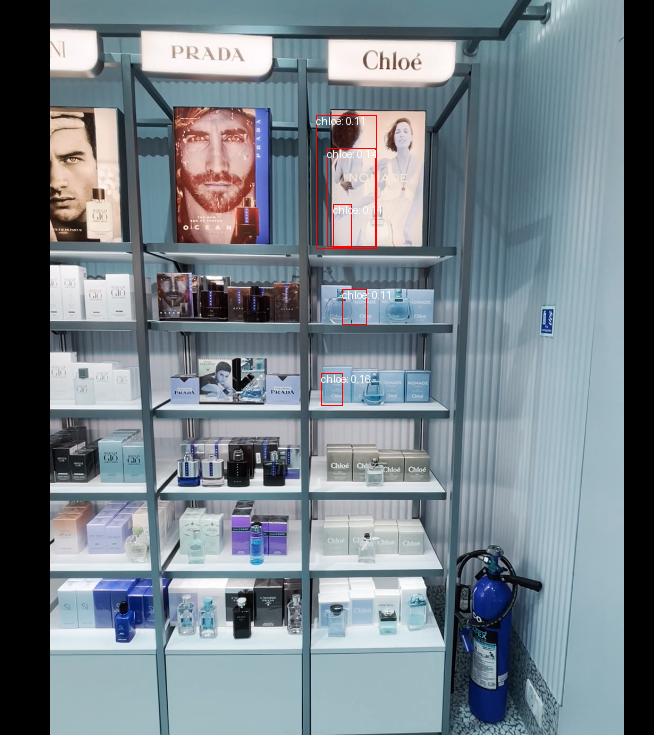

In [42]:
from PIL import ImageDraw
image2=cv2.imread("C:\\Users\\rishi\\OneDrive\\Desktop\\Zero-Shot\\res\\test.png")
image2 = Image.fromarray(np.uint8(image2)).convert("RGB")

draw = ImageDraw.Draw(image2)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image2

In [51]:
image2=cv2.imread("C:\\Users\\rishi\\OneDrive\\Desktop\\Zero-Shot\\res\\test.png")
image2 = Image.fromarray(np.uint8(image2)).convert("RGB")
image_target = image2

imageq=cv2.imread("C:\\Users\\rishi\\OneDrive\\Desktop\\Zero-Shot\\res\\testprada.png")
imageq = Image.fromarray(np.uint8(image2)).convert("RGB")
query_image = imageq

In [52]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

In [53]:
inputs = processor(images=image_target, query_images=query_image, return_tensors="pt")

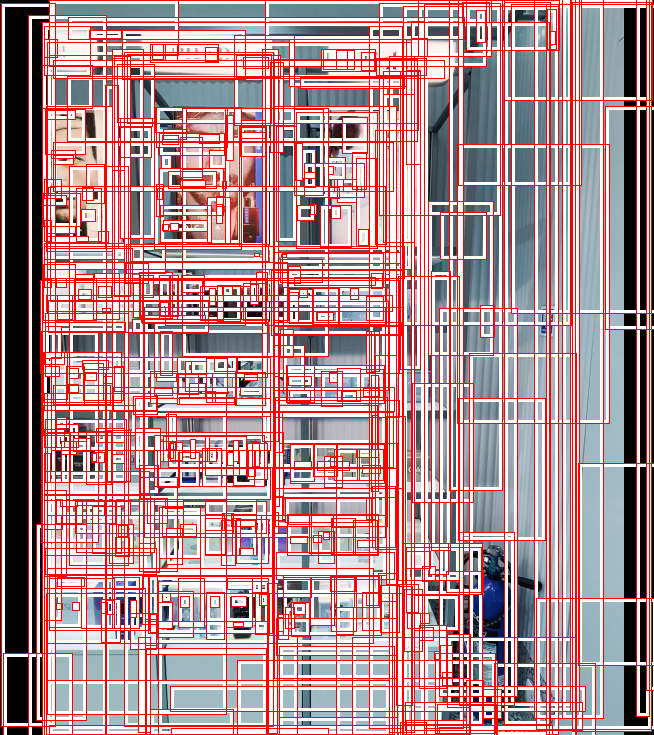

In [56]:
with torch.no_grad():
    outputs = model.image_guided_detection(**inputs)
    target_sizes = torch.tensor([image_target.size[::-1]])
    results = processor.post_process_image_guided_detection(outputs=outputs, target_sizes=target_sizes)[0]
image_target = image2
draw = ImageDraw.Draw(image_target)

scores = results["scores"].tolist()
boxes = results["boxes"].tolist()
labels = results["labels"]

for box, score in zip(boxes, scores):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)

image_target